In [42]:
import pandas as pd
import numpy as np


In [44]:
# Load the dataset
df =  pd.read_excel("sheet1.xlsx")
df.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [47]:
#df.drop(['Column1', 'Column2', 'etc..'], axis=1, inplace=True)
a=df.drop(['PE'],axis=1).values
b=df['PE'].values
print(a)
print(b)


[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [49]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(a_train,b_train)

LinearRegression()

In [52]:
b_pred=ml.predict(a_test)
print(b_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [53]:
ml.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

In [54]:
from sklearn.metrics import r2_score
r2_score(b_test,b_pred)

0.9304112159477683

Text(0.5, 1.0, 'Actual vs Predicted')

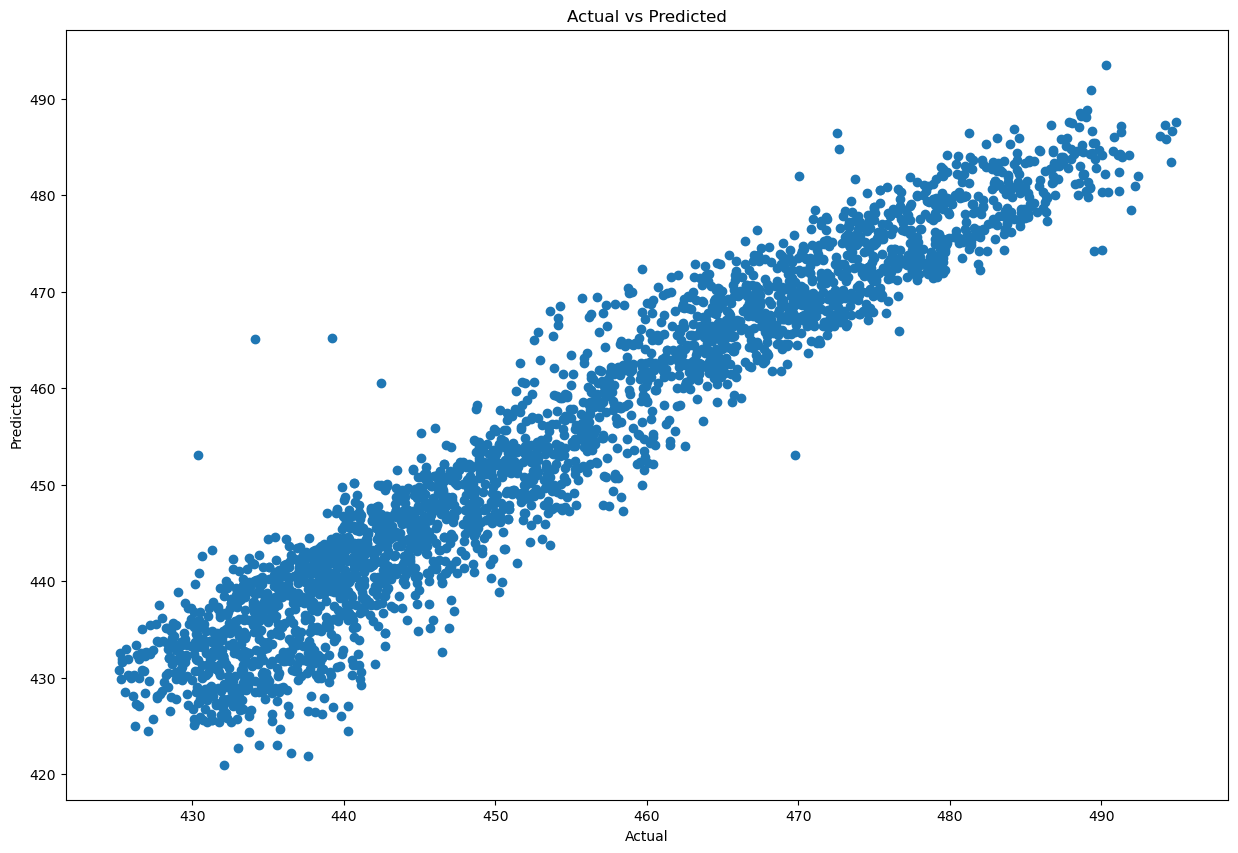

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(b_test,b_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


In [56]:
pred_b_df=pd.DataFrame({'Actual Value':b_test,'Predicted value':b_pred,'Difference':b_test-b_pred})
pred_b_df[0:20]

,Actual Value,Predicted value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
